# Project 1: "Custom Segmentation"

## Aim:
En este proyecto se va a realizar una Clasificación no supervisada a cerca de el tipo de clientes que compran en alguna tienda de retail via online. Con esto se ejecutará una estrategia para identificar al cliente y quizás hacer recomendaciones al respecto. Para lograr esto habrá que hacer una clasificación mediante KMeans y Gaussian Mixture Models para identificar los clientes, para luego hacer implementar un algoritmo de recomendación. 

## Content:
  1. Knowing Data.
  2. Data Visualization.
  3. Preprocessing data: Making new variables and transforming variables.   
  4.
  5. 

# 1.

In [1]:
#Instalar openpyxl para el uso en el docker
!pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 6.7 MB/s eta 0:00:0000:01

[notice] A new release of pip is available: 23.0.1 -> 23.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [3]:
PATH = "online_retail_II.xlsx"
ds = pd.read_excel(PATH)

In [4]:
ds.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


**Variables:**

 -`Invoice`: Número de la factura, debería corresponder a un mismo  `ID Customer`.
 
 -`StockCode`: Corresponde al ID del producto.
 
 -`Description`: El producto en sí.
 
 -`Quantity`: Cantidad del producto (el stock).
 
 -`InvoiceDate`: Fecha y hora en la que se emitió la factura o boleta.
 
 -`Price`: Precio (Supongo que en Dólares).
 
 -`Customer ID`: ID del Cliente.
 
 -`Country`: Nacionalidad del cliente. 

**Exploración de datos:**

In [5]:
(ds.isna().sum()/ds.shape[0])*100 

Invoice         0.000000
StockCode       0.000000
Description     0.557225
Quantity        0.000000
InvoiceDate     0.000000
Price           0.000000
Customer ID    20.539488
Country         0.000000
dtype: float64

> Se procederá a quitar aquellos datos faltantes pertenecientes en su mayoría a los costumers (\~ 20\%), ya que pertenecen a nuestra variable dependiente o **target**.

In [6]:
ds.dropna(axis=0,inplace=True)
print((ds.isna().sum()/ds.shape[0])*100 )

Invoice        0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
Price          0.0
Customer ID    0.0
Country        0.0
dtype: float64


In [7]:
ds.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

In [8]:
ds['Description'].value_counts()

Description
WHITE HANGING HEART T-LIGHT HOLDER    3245
REGENCY CAKESTAND 3 TIER              1872
STRAWBERRY CERAMIC TRINKET BOX        1536
ASSORTED COLOUR BIRD ORNAMENT         1376
HOME BUILDING BLOCK WORD              1229
                                      ... 
BLUE OWL DECORATION                      1
PINK OWL DECORATION                      1
IVORY WALL CLOCK                         1
RED WALL CLOCK                           1
BAKING MOULD EASTER EGG MILK CHOC        1
Name: count, Length: 4459, dtype: int64

In [9]:
ds['Customer ID'].value_counts()

Customer ID
14911.0    5710
17841.0    5114
14606.0    3927
14156.0    2710
12748.0    2665
           ... 
18174.0       1
14827.0       1
17645.0       1
16443.0       1
13222.0       1
Name: count, Length: 4383, dtype: int64

In [10]:
len(ds[ds['Country']=="United Kingdom"]["Customer ID"].unique())

4035

In [11]:
ds[ds['Customer ID']==13085.0]["Invoice"].unique()

array([489434, 489435, 490068, 490069, 496092, 496166, 'C527339'],
      dtype=object)

In [12]:
ds[ds['Customer ID']==14911.0]["Invoice"].unique()

array([489520, 490542, 490687, 490972, 'C490997', 'C491013', 'C491021',
       491160, 'C491619', 'C491827', 492015, 492650, 'C492651', 492749,
       492761, 'C492828', 'C493859', 'C493868', 493877, 493897, 'C493898',
       493900, 'C494356', 'C495054', 495055, 495056, 495073, 'C495231',
       495277, 495488, 495733, 495734, 495758, 496008, 496334, 496564,
       496584, 'C496586', 497337, 'C497338', 497339, 'C497930', 498021,
       'C498122', 498135, 498249, 498254, 498569, 498921, 'C498922',
       498935, 499067, 499919, 499922, 499921, 500123, 'C500698', 501043,
       501201, 501281, 'C501323', 501484, 501627, 501628, 501810,
       'C502292', 'C502332', 502334, 502422, 'C502452', 'C502454', 502455,
       502456, 502595, 502673, 503067, 'C504197', 'C504199', 504913,
       504915, 505522, 'C505800', 505806, 505884, 506290, 506308, 506730,
       506731, 'C506739', 506740, 'C506753', 507064, 507386, 507393,
       507396, 507478, 507673, 'C508911', 509154, 509536, 'C509629',
 

In [13]:
ds = ds.astype({"Invoice":str,"StockCode":str,"Customer ID":str})
ds[ds['Customer ID']=="14911.0"]["Invoice"].unique()

array(['489520', '490542', '490687', '490972', 'C490997', 'C491013',
       'C491021', '491160', 'C491619', 'C491827', '492015', '492650',
       'C492651', '492749', '492761', 'C492828', 'C493859', 'C493868',
       '493877', '493897', 'C493898', '493900', 'C494356', 'C495054',
       '495055', '495056', '495073', 'C495231', '495277', '495488',
       '495733', '495734', '495758', '496008', '496334', '496564',
       '496584', 'C496586', '497337', 'C497338', '497339', 'C497930',
       '498021', 'C498122', '498135', '498249', '498254', '498569',
       '498921', 'C498922', '498935', '499067', '499919', '499922',
       '499921', '500123', 'C500698', '501043', '501201', '501281',
       'C501323', '501484', '501627', '501628', '501810', 'C502292',
       'C502332', '502334', '502422', 'C502452', 'C502454', '502455',
       '502456', '502595', '502673', '503067', 'C504197', 'C504199',
       '504913', '504915', '505522', 'C505800', '505806', '505884',
       '506290', '506308', '506730'

In [14]:
ds[ds['Customer ID']=="13085.0"]['InvoiceDate'].head(60)

0       2009-12-01 07:45:00
1       2009-12-01 07:45:00
2       2009-12-01 07:45:00
3       2009-12-01 07:45:00
4       2009-12-01 07:45:00
5       2009-12-01 07:45:00
6       2009-12-01 07:45:00
7       2009-12-01 07:45:00
8       2009-12-01 07:46:00
9       2009-12-01 07:46:00
10      2009-12-01 07:46:00
11      2009-12-01 07:46:00
7739    2009-12-03 14:06:00
7740    2009-12-03 14:06:00
7741    2009-12-03 14:06:00
7742    2009-12-03 14:06:00
7743    2009-12-03 14:06:00
7744    2009-12-03 14:06:00
7745    2009-12-03 14:06:00
7746    2009-12-03 14:06:00
7747    2009-12-03 14:06:00
7748    2009-12-03 14:07:00
7749    2009-12-03 14:07:00
7750    2009-12-03 14:07:00
7751    2009-12-03 14:07:00
7752    2009-12-03 14:07:00
74247   2010-01-29 10:06:00
74248   2010-01-29 10:06:00
74249   2010-01-29 10:06:00
74250   2010-01-29 10:06:00
74251   2010-01-29 10:06:00
74252   2010-01-29 10:06:00
74253   2010-01-29 10:06:00
74254   2010-01-29 10:06:00
74255   2010-01-29 10:06:00
74256   2010-01-29 1

El formato de la columna fecha es _año-mes-día hora:min:seg_ Con esta información podríamos designar algún peso con respecto a la fecha en el cual se hicieron las compras; como por ejemplo sí hay productos que a tal fecha tuvieron diferente precio.

In [15]:
grupo = ds.groupby('StockCode')

In [16]:
grupo.get_group("85048")[['InvoiceDate','Price','Customer ID','Country']]

,InvoiceDate,Price,Customer ID,Country
0,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
400,2009-12-01 11:35:00,7.95,15461.0,United Kingdom
626,2009-12-01 11:50:00,7.95,16714.0,United Kingdom
1134,2009-12-01 12:35:00,6.95,17641.0,United Kingdom
1256,2009-12-01 12:55:00,6.95,17056.0,United Kingdom
...,...,...,...,...
522573,2010-12-09 08:34:00,7.95,14243.0,United Kingdom
523103,2010-12-09 12:32:00,7.95,14527.0,United Kingdom
523546,2010-12-09 14:05:00,7.95,17978.0,United Kingdom
524636,2010-12-09 15:23:00,7.95,16042.0,United Kingdom


In [17]:
#Descriptions of Stocks:
grupo.get_group("85048")[['Description']].value_counts().index[0][0]

'15CM CHRISTMAS GLASS BALL 20 LIGHTS'

In [18]:
grupo.get_group("85048")[['Country']].value_counts()

Country       
United Kingdom    260
EIRE               11
Spain               1
Switzerland         1
Name: count, dtype: int64

In [19]:
grupo2 = ds.groupby(['StockCode','Country'])

In [20]:
grupo2.get_group(("22041",'EIRE'))[['InvoiceDate','Price','Customer ID']]

,InvoiceDate,Price,Customer ID
109673,2010-03-03 12:21:00,2.55,14911.0
322110,2010-08-31 10:52:00,2.55,14911.0
392562,2010-10-14 17:51:00,2.55,14911.0


In [21]:
grupo2.get_group(("85048",'Spain'))[['InvoiceDate','Price','Customer ID']]

,InvoiceDate,Price,Customer ID
404602,2010-10-20 14:28:00,7.95,12421.0


In [22]:
grupo2.get_group(("85048",'Switzerland'))[['InvoiceDate','Price','Customer ID']]

,InvoiceDate,Price,Customer ID
447601,2010-11-10 13:19:00,7.95,12422.0


El precio exactamente varía según la fecha en el cual se compró el producto ¿Hay alguna relación con respecto al cliente y su nacionalidad?- Sí, Hay variación de precio por fecha y por Nacionalidad aunque no se aprecia una correlación muy relevante.


Siguiente paso será notar algunas correlaciones, ordenar, limpiar y preparar los datos para visualizar, y luego hacer un análisis respectivo. 

Como queremos que realizar una segmentación de clientes, entonces defininimos la columna `Customer ID` como nuestra `Clase`. 

___


Visualicemos un poco...

In [23]:
ds['Customer ID'].value_counts()

Customer ID
14911.0    5710
17841.0    5114
14606.0    3927
14156.0    2710
12748.0    2665
           ... 
18174.0       1
14827.0       1
17645.0       1
16443.0       1
13222.0       1
Name: count, Length: 4383, dtype: int64

Tengo un total de **4383 clientes**, con diferentes frecuencias. Como una técnica de validación de la segmentación de clientes podría usar como test aquellos clientes que solo han ido a comprar una sola vez.


___
___
___


<Figure size 640x480 with 0 Axes>

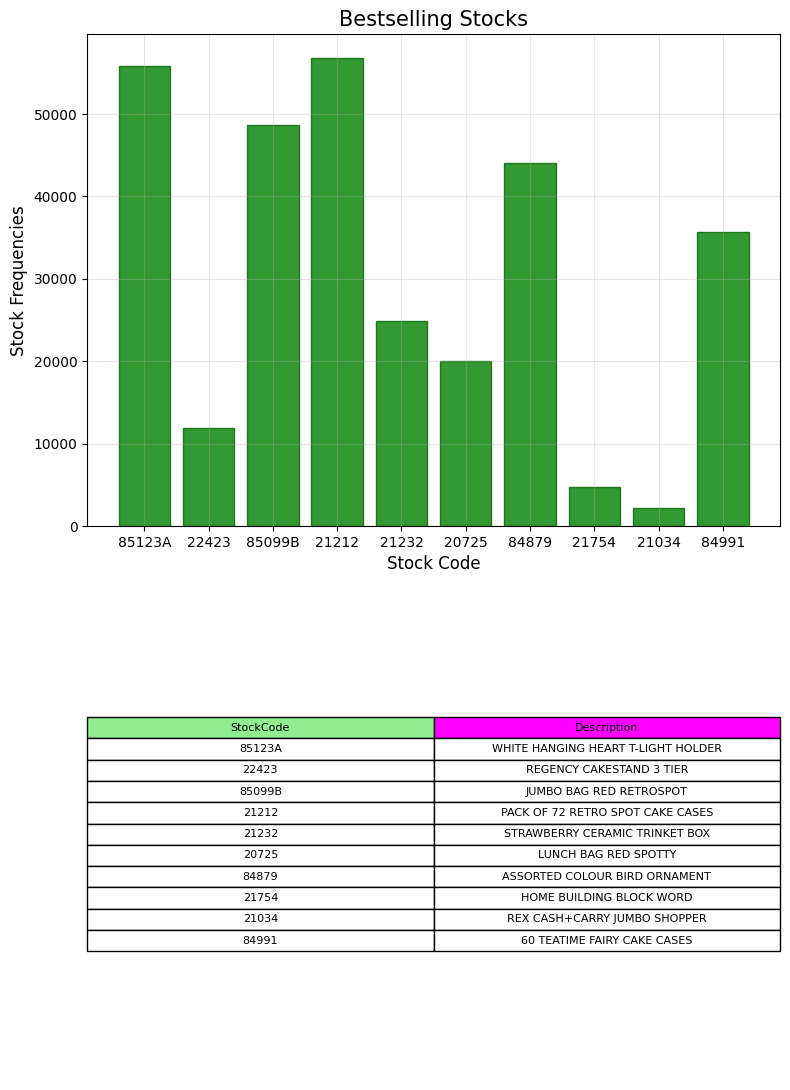

In [32]:
stock_index = np.array(ds['StockCode'].value_counts().iloc[:10].index)
stock_freq = [] #np.array(ds['StockCode'].value_counts().iloc[:8])

#descriptions
descr = []
for s in stock_index:
    descr.append(grupo.get_group(s)[['Description']].value_counts().index[0][0])
    stock_freq.append(grupo.get_group(s)[['Quantity']].sum()[0])
descr, stock = np.array(descr),np.array(stock_freq)
#making pandas table    
df_table = pd.DataFrame(
    data=np.concatenate([stock_index.reshape(len(stock_index),1),descr.reshape(len(stock_index),1)],axis=1),
    columns=['StockCode','Description']
)

plt.figure()
fig, (ax1, ax2) = plt.subplots(ncols=1,nrows=2,figsize=[8,11],frameon=True)

table = ax2.table(cellText=df_table.values,
                  cellLoc='center',
                  colLabels=df_table.columns,
                  colColours=['lightgreen','magenta'],
                  loc = "center",
                  fontsize=20
                 )
ax2.axis("tight")
ax2.axis("off")

ax1.set_title("Bestselling Stocks",fontsize=15)
ax1.bar(stock_index,stock_freq,color="green",edgecolor="darkgreen",alpha=0.8)
ax1.set_ylabel("Stock Frequencies",fontsize=12)
ax1.set_xlabel("Stock Code",fontsize=12)
ax1.grid(visible=True,alpha=.3)

plt.tight_layout()
plt.show()

In this small sample of the data we can see the products most purchasesd by customer correspond to home devices and different kind ob bags. If I show all data it is possible to observe the products with less purchase.  
___

/tmp/ipykernel_13/800685317.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels=customer_index, rotation=45)
/tmp/ipykernel_13/800685317.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels=customer_index, rotation=45)


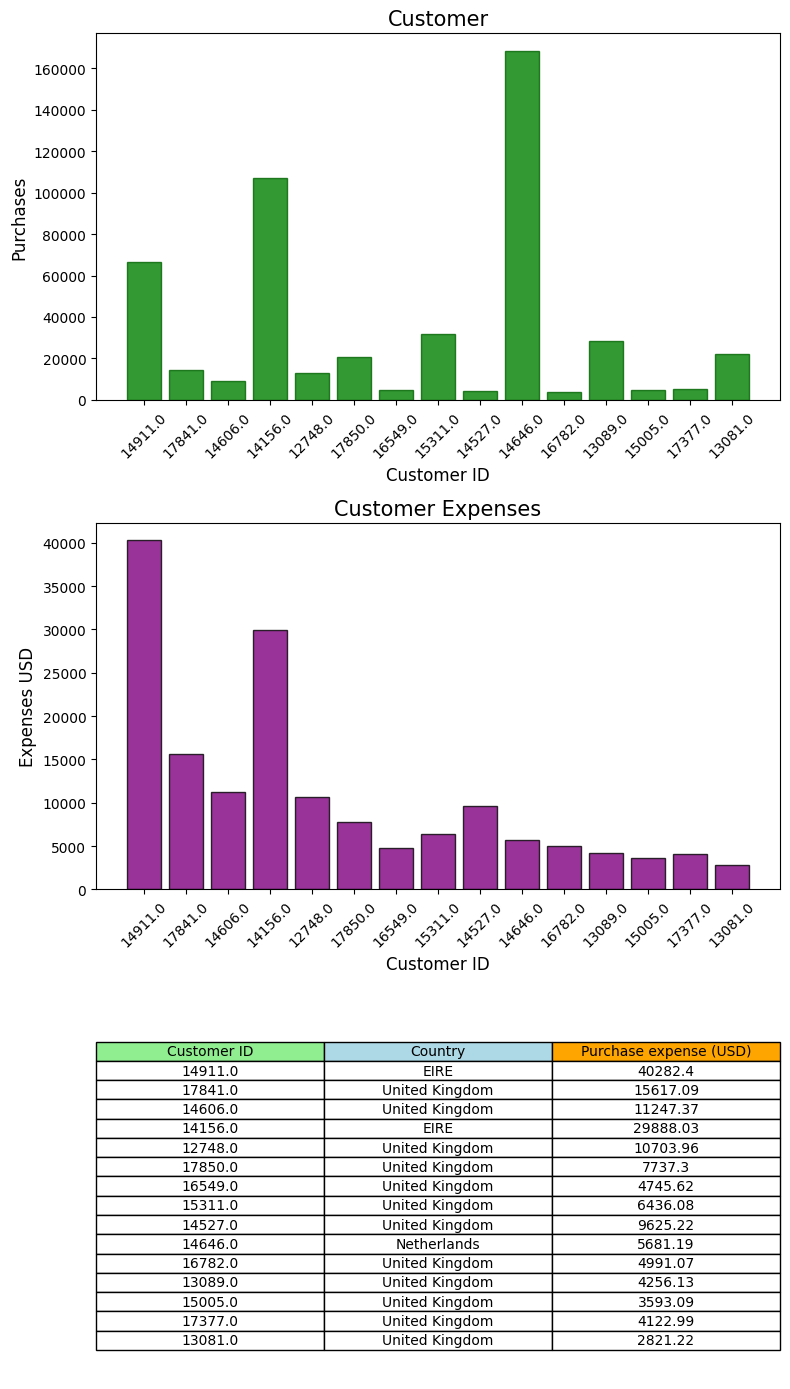

In [25]:
grupo3 = ds.groupby('Customer ID')

customer_index = np.array(ds['Customer ID'].value_counts().iloc[:15].index)
customer_freq = []#np.array(ds['Customer ID'].value_counts().iloc[:8])

country, expense = [],[]
for s in customer_index:
    country.append(grupo3.get_group(s)[['Country']].value_counts().index[0][0])
    customer_freq.append(grupo3.get_group(s)[['Quantity']].sum()[0])
    expense.append(round(grupo3.get_group(s)[['Price']].sum()[0],2))

country, expense = np.array(country), np.array(expense)

#making pandas table    
df_table = pd.DataFrame(
    data=np.concatenate([customer_index.reshape(len(customer_index),1),
                         country.reshape(len(customer_index),1),
                         expense.reshape(len(customer_index),1)
                        ],axis=1),
    columns=['Customer ID','Country','Purchase expense (USD)']
)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=1,nrows=3,figsize=[8,14])


table = ax3.table(cellText=df_table.values,
                  cellLoc='center',
                  colLabels=df_table.columns,
                  colColours=['lightgreen','lightblue','orange'],
                  loc = "center",
                  fontsize=20
                 )
ax3.axis("tight")
ax3.axis("off")

ax1.set_title("Customer",fontsize=15)
ax1.bar(customer_index,customer_freq,color="green",edgecolor="darkgreen",alpha=0.8)
ax1.set_ylabel("Purchases",fontsize=12)
ax1.set_xlabel("Customer ID",fontsize=12)
ax1.set_xticklabels(labels=customer_index, rotation=45)

ax2.set_title("Customer Expenses",fontsize=15)
ax2.bar(customer_index,expense,color="purple",edgecolor="black",alpha=0.8)
ax2.set_ylabel("Expenses USD",fontsize=12)
ax2.set_xlabel("Customer ID",fontsize=12)
ax2.set_xticklabels(labels=customer_index, rotation=45)


plt.tight_layout()
plt.show()

#add money spent in these purchases per customer.

In thee above _bar charts_ there is little correlation between the amount of stock purchased and the amount spent on purchases. However, it is still possible to make some analysis. For instance, there are customers who purchase a few products but spend less money compared to other customers who also purchase a few products but spend more. Conversely, there are customers who purchase more products but are modest in terms of expenses

Now, It is possible to make another analysis with respect to the date. 

In [26]:
#checking the date columns type
ds.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID            object
Country                object
dtype: object

In [27]:
ds['InvoiceDate']

0        2009-12-01 07:45:00
1        2009-12-01 07:45:00
2        2009-12-01 07:45:00
3        2009-12-01 07:45:00
4        2009-12-01 07:45:00
                 ...        
525456   2010-12-09 20:01:00
525457   2010-12-09 20:01:00
525458   2010-12-09 20:01:00
525459   2010-12-09 20:01:00
525460   2010-12-09 20:01:00
Name: InvoiceDate, Length: 417534, dtype: datetime64[ns]

__Now, I gonna make diferent columns with date data.__



In [28]:
ds2 = ds.copy()
ds2['Day'] = ds2['InvoiceDate'].dt.day 
ds2['Month'] = ds2['InvoiceDate'].dt.month
ds2['Year'] = ds2['InvoiceDate'].dt.year
ds2['Hours'] = ds2['InvoiceDate'].dt.hour
ds2['Minutes'] = ds2['InvoiceDate'].dt.minute 
ds2.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Day,Month,Year,Hours,Minutes
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,1,12,2009,7,45
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,1,12,2009,7,45
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,1,12,2009,7,45
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,1,12,2009,7,45
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,1,12,2009,7,45
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom,1,12,2009,7,45
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,1,12,2009,7,45
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom,1,12,2009,7,45
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom,1,12,2009,7,46
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom,1,12,2009,7,46


In [29]:
ds2['Year'].value_counts()

Year
2010    385774
2009     31760
Name: count, dtype: int64

In [42]:
ds2[ds2['Year']==2010]['Month'].value_counts()

Month
11    61490
10    50561
9     35386
3     33114
6     31950
5     29604
4     27833
7     27746
8     26942
2     23906
1     22439
12    14803
Name: count, dtype: int64

In [45]:
grupo_y = ds2.groupby(['Year','Month'])

In [50]:
ds_2009 = grupo_y.get_group((2009,12))[['Price','Quantity','Customer ID']]
ds_2009

,Price,Quantity,Customer ID
0,6.95,12,13085.0
1,6.75,12,13085.0
2,6.75,12,13085.0
3,2.10,48,13085.0
4,1.25,24,13085.0
...,...,...,...
45219,2.95,1,17867.0
45220,2.95,1,17867.0
45221,2.95,1,17867.0
45222,0.95,10,17867.0


In [52]:
sum(ds_2009['Price'] * ds_2009['Quantity'])

663272.0499999978

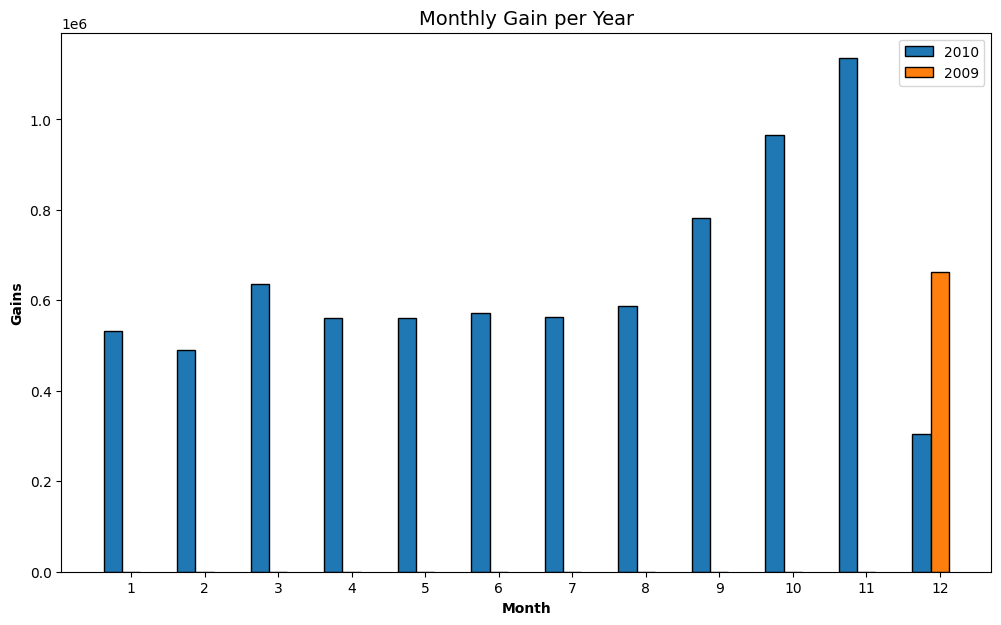

In [68]:
meses = sorted(ds2['Month'].unique())
prices = {}
for y in ds2['Year'].unique():
    prices[str(y)]=[]
    for m in ds2[ds2['Year']==y]['Month'].unique():
        sub_g = grupo_y.get_group((y,m))[['Price','Quantity']]
        prices[str(y)].append(round(sum(sub_g['Price']*sub_g['Quantity']),2))
        
plt.figure(figsize=[12,7])
plt.title("Monthly Gain per Year",fontsize=14)
plt.bar(np.arange(len(meses)),prices['2010'],width=0.25,edgecolor='black',label='2010')
pad = np.zeros(11).tolist()
pad.append(prices['2009'][0])
plt.bar([x + 0.25 for x in np.arange(len(meses))],pad,width=0.25,edgecolor='black',label='2009')
plt.xlabel("Month",fontweight='bold')
plt.ylabel("Gains",fontweight='bold')
plt.xticks([r + 0.25 for r in range(len(meses))],meses)

plt.legend()
plt.show()
    

Possible Analysis: 
- why are there more gains in November of 2010?
- Why is the December gain of 2009 better than in December of 2010?- To answer this question, It possible to make a chart of the gains only in decembers and what products were the bestsellers (to see this for November too).